In [ ]:
#Q2.
"""
Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv
  """



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [22]:
# Display the first few rows of the dataset
print(df.head())


   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]


In [23]:
df.shape # to check the dimension of the data set (rows, columns)

(571, 43)

In [24]:
df.dtypes #Checking the types of columns

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [25]:
# Check for missing values
print(df.isnull().sum())

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


In [27]:
# Filling missing values with the mode of each non-numeric column
non_numeric_columns = df.select_dtypes(exclude=np.number).columns

for column in non_numeric_columns:
    mode_value = df[column].mode()[0]  # Calculate the mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)

#NOTE:Filling missing values with the mean directly may not be applicable. The mean is a numeric concept, and we calculate it for numerical columns.

In [ ]:
''''# Mode: The mode is the value that appears most frequently in a dataset. 
It is another measure of central tendency and is especially useful for categorical data.'''

In [29]:
# Again check for missing values, after filling all null values
print(df.isnull().sum())

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [31]:
# Statistical summary of the dataset
print(df.describe())

             CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000


In [37]:
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in df:
    df[col] = label_encoder.fit_transform(df[col])

# Check if there are still missing values
print(df.isnull().sum())


Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [38]:
#Again Checking the types of columns
df.dtypes

Seat No.     int64
PH-121       int64
HS-101       int64
CY-105       int64
HS-105/12    int64
MT-111       int64
CS-105       int64
CS-106       int64
EL-102       int64
EE-119       int64
ME-107       int64
CS-107       int64
HS-205/20    int64
MT-222       int64
EE-222       int64
MT-224       int64
CS-210       int64
CS-211       int64
CS-203       int64
CS-214       int64
EE-217       int64
CS-212       int64
CS-215       int64
MT-331       int64
EF-303       int64
HS-304       int64
CS-301       int64
CS-302       int64
TC-383       int64
MT-442       int64
EL-332       int64
CS-318       int64
CS-306       int64
CS-312       int64
CS-317       int64
CS-403       int64
CS-421       int64
CS-406       int64
CS-414       int64
CS-419       int64
CS-423       int64
CS-412       int64
CGPA         int64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Seat No.   571 non-null    int64
 1   PH-121     571 non-null    int64
 2   HS-101     571 non-null    int64
 3   CY-105     571 non-null    int64
 4   HS-105/12  571 non-null    int64
 5   MT-111     571 non-null    int64
 6   CS-105     571 non-null    int64
 7   CS-106     571 non-null    int64
 8   EL-102     571 non-null    int64
 9   EE-119     571 non-null    int64
 10  ME-107     571 non-null    int64
 11  CS-107     571 non-null    int64
 12  HS-205/20  571 non-null    int64
 13  MT-222     571 non-null    int64
 14  EE-222     571 non-null    int64
 15  MT-224     571 non-null    int64
 16  CS-210     571 non-null    int64
 17  CS-211     571 non-null    int64
 18  CS-203     571 non-null    int64
 19  CS-214     571 non-null    int64
 20  EE-217     571 non-null    int64
 21  CS-212     571 n

In [40]:
df.skew()  #default acceptable range is [-0.5 to +0.5]

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.012061
dtype: float64

In [43]:
# Drop irrelevant columns
df = df.drop(['Seat No.'], axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,72
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,48
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,409
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,33
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,459
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,457
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,369
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,70


In [44]:
#Checking the correlation between feature and the target. NOTE: RAnge is from (-1 to +1) & 0 represent no correlation
cor=df.corr()
cor


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.644983
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.541003
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.636770
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.614600
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.732980
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.587644
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.536539
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642013
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.643000
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.672198


In [45]:
# Split the dataset into features (x) and target variable (y)
x = df.drop(['CGPA'], axis=1)
y = df['CGPA']

In [48]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize RandomForestClassifier
    RFR = RandomForestClassifier()
    
    # Train the model
    RFR.fit(x_train, y_train)
    
    # Make predictions
    pred = RFR.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, pred)
    
    # Update max accuracy and corresponding random state if the current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "at random_state", maxRS)


Best accuracy is 0.01744186046511628 at random_state 7


In [49]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= i)

In [53]:
#important necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [54]:
# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(x_train, y_train)

# Make predictions on the test set
pred_LR = LR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = LR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.9728621764959223
R2_score on training data: 95.65193987194985
Mean Absolute Error: 17.650481904723645
Mean Squared Error: 526.2299712918185
Root Mean Squared Error: 22.93970294689577


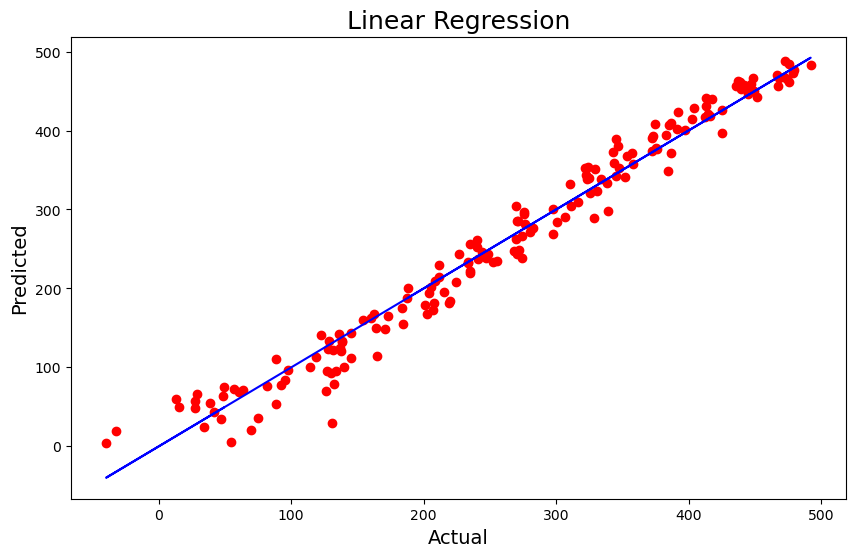

In [55]:
#scatter plot with the actual vs. predicted values for Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [56]:
RFR = RandomForestRegressor()

# Fit the model to the training data
RFR.fit(x_train, y_train)

# Make predictions on the test set
pred_RFR =RFR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = RFR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.9622742388234876
R2_score on training data: 98.97882961615177
Mean Absolute Error: 21.67
Mean Squared Error: 731.5408406976744
Root Mean Squared Error: 27.047011677774577


In [57]:
knn = KNN()

# Fit the model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test set
pred_knn =knn.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = knn.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.9670829703136637
R2_score on training data: 95.454409091065
Mean Absolute Error: 19.936046511627907
Mean Squared Error: 638.2946511627906
Root Mean Squared Error: 25.26449388297321


In [58]:
GBR = GradientBoostingRegressor()

# Fit the model to the training data
GBR.fit(x_train, y_train)

# Make predictions on the test set
pred_GBR =GBR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = GBR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.9705211760417689
R2_score on training data: 99.57370383400495
Mean Absolute Error: 18.75710076102875
Mean Squared Error: 571.6243486853556
Root Mean Squared Error: 23.908666811124277


In [59]:
lasso = Lasso()

# Fit the model to the training data
lasso.fit(x_train, y_train)

# Make predictions on the test set
pred_lasso =lasso.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = lasso.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.9738263813757315
R2_score on training data: 95.63321342967723
Mean Absolute Error: 17.349605022382526
Mean Squared Error: 507.5330589861874
Root Mean Squared Error: 22.528494379034463


In [60]:
rd = Ridge()

# Fit the model to the training data
rd.fit(x_train, y_train)

# Make predictions on the test set
pred_rd =rd.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = rd.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.9728749645789919
R2_score on training data: 95.65193901823244
Mean Absolute Error: 17.646765080499712
Mean Squared Error: 525.9819973676907
Root Mean Squared Error: 22.93429740296595


In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test set
pred_dtr =dtr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = dtr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_dtr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score: 0.8609059777569832
R2_score on training data: 100.0
Mean Absolute Error: 39.25581395348837
Mean Squared Error: 2697.1744186046512
Root Mean Squared Error: 51.93432794024248


In [62]:
from sklearn.svm import SVR

svr=SVR()
# Fit the model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test set
pred_svr =svr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = svr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score: 0.45371899116506687
R2_score on training data: 43.975977037074664
Mean Absolute Error: 86.87508934133437
Mean Squared Error: 10592.943813393065
Root Mean Squared Error: 102.92202783366186


In [63]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
# Fit the model to the training data
etr.fit(x_train, y_train)

# Make predictions on the test set
pred_etr =etr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = etr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_etr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score: 0.9723865821107327
R2_score on training data: 100.0
Mean Absolute Error: 18.23889534883721
Mean Squared Error: 535.4522296511627
Root Mean Squared Error: 23.13984074385912


In [65]:
from sklearn.model_selection import cross_val_score

In [ ]:
""" default scoring parameter in cross validation for classification models is - accuracy
default scoring parameter in cross validation for regression model is - r squared score  """

In [66]:
#cross_val_score on the Linear regression model (to insure overfitting or not )

score= cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_LR)- score.mean())*100)

[0.92273282 0.95960282 0.96206156 0.97245037 0.92853884]
0.9490772820027684
Difference between R2 score and cross validation score is  2.3784894493153907


In [67]:
#cross_val_score on the RandomForestRegressor
score1= cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_RFR)- score1.mean())*100)

[0.92196582 0.93754622 0.95817185 0.94512755 0.91226377]
0.9350150425981185
Difference between R2 score and cross validation score is  2.72591962253691


In [68]:
#cross_val_score on the KNN

score2= cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_knn)- score2.mean())*100)

[0.92369227 0.94367138 0.94649935 0.9546646  0.90501688]
0.9347088955072984
Difference between R2 score and cross validation score is  3.237407480636534


In [69]:
#cross_val_score on the GradientBoostingRegressor

score3= cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_GBR)- score3.mean())*100)

[0.93486194 0.96357505 0.96690738 0.95822505 0.93398053]
0.9515099881034542
Difference between R2 score and cross validation score is  1.9011187938314689


In [70]:
#cross_val_score on the lasso
score4= cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_lasso)- score4.mean())*100)

[0.92438368 0.95981573 0.96244599 0.97301367 0.92733898]
0.949399611680844
Difference between R2 score and cross validation score is  2.442676969488755


In [71]:
#cross_val_score on the Ridge
score5= cross_val_score(rd,x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_rd)- score5.mean())*100)

[0.92274784 0.95960192 0.96207275 0.97246729 0.92854366]
0.9490866922684956
Difference between R2 score and cross validation score is  2.3788272310496295


In [72]:
#cross_val_score on the DecisionTreeRegressor
score6= cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_dtr)- score6.mean())*100)

[0.81639153 0.75650563 0.84974646 0.72415984 0.79208022]
0.787776733829484
Difference between R2 score and cross validation score is  7.31292439274992


In [73]:
#cross_val_score on the SVR
score7= cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_svr)- score7.mean())*100)

[0.46365265 0.50200058 0.49520995 0.48750034 0.44562865]
0.47879843325104776
Difference between R2 score and cross validation score is  -2.5079442085980896


In [74]:
#cross_val_score on the ExtraTreesRegressor
score8= cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_etr)- score8.mean())*100)

[0.94459939 0.96556102 0.96511337 0.96567337 0.92798527]
0.9537864835638133
Difference between R2 score and cross validation score is  1.8600098546919352


In [ ]:
"""GridSearchCV performs a search over the specified parameter values using cross-validation.
The best hyperparameters are printed, and the best model is obtained.
The model is evaluated on the test set using Mean Squared Error and R-squared."""

In [75]:
#GridSearchCV performs a search over the specified parameter values using cross-validation. (Gradient Boosting Regressor)

from sklearn.model_selection import GridSearchCV
# Initialize the model
GBR = GradientBoostingRegressor() #already defined above still writing to easy remember

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
gscv = GridSearchCV(estimator=GBR, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [76]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [77]:
# Get the best parameters and best model
best_params = gscv.best_params_
best_model = gscv.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 542.5767279859159
R-squared: 0.9720191697835918


In [78]:
from sklearn.ensemble import GradientBoostingRegressor

Model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=1.0,random_state=1)

#n_estimators is the number of boosting stages to be run.
#learning_rate is the shrinkage applied to each tree's contribution.
#max_depth is the maximum depth of the individual trees.
#subsample is the fraction of samples used for fitting the trees.
#random_state is the seed used by the random number generator.

In [79]:
#Again building the model & checking the performance

Model.fit(x_train, y_train)

# Make predictions on the test set
pred =Model.predict(x_test)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.9706733763718163
Mean Absolute Error: 18.73845522447808
Mean Squared Error: 568.6730296416822
Root Mean Squared Error: 23.846866243632142


In [ ]:
# Now Saving the model , after checking the performance of the final model

In [80]:
import pickle
filename='Insurence_cost.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model

In [ ]:
#After saving the model if we want to use the same model in future , we can load the model by using the 'open'method

In [81]:
import pickle
loaded_model=pickle.load(open('Insurence_cost.pkl','rb')) # rb= read binary
result=loaded_model.score(x_test,y_test)
print(result*100)

97.06733763718162


In [82]:
#Now if we want to see what the difference between our predicted and original value

conclusion= pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
Predicted,172.892942,372.944321,167.696014,404.963393,326.52172,478.782528,427.494229,352.786297,251.49912,82.168513,...,204.643657,97.854355,314.253924,341.460523,286.162936,138.305284,364.592923,335.131059,205.977766,65.758105
Original,201.000000,402.000000,167.000000,390.000000,305.00000,442.000000,466.000000,353.000000,237.00000,36.000000,...,210.000000,95.000000,291.000000,333.000000,284.000000,123.000000,401.000000,354.000000,230.000000,64.000000


In [88]:
##JUST checking dont know if its needed 
# Make predictions on the test set
y_pred = Model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 568.6730296416822
